In [187]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
%matplotlib inline

In [205]:
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np

In [189]:
seds = pd.read_csv('/Users/taotu/Dropbox (LIINC)/DataThon2019/Tao/Datasets/seds.csv')

In [190]:
seds.head(5)

,year,msn,state_name,state_code,description,energy_bin,value,unit
0,1960,ABICB,Alaska,AK,Aviation gasoline blending components consumed...,Petroleum,0.0,Billion Btu
1,1961,ABICB,Alaska,AK,Aviation gasoline blending components consumed...,Petroleum,0.0,Billion Btu
2,1962,ABICB,Alaska,AK,Aviation gasoline blending components consumed...,Petroleum,0.0,Billion Btu
3,1963,ABICB,Alaska,AK,Aviation gasoline blending components consumed...,Petroleum,0.0,Billion Btu
4,1964,ABICB,Alaska,AK,Aviation gasoline blending components consumed...,Petroleum,0.0,Billion Btu


In [192]:
state = 'Texas'

In [193]:
coal_price_all = seds[seds["msn"].str.startswith("CL") & seds["msn"].str.endswith('D')]

In [194]:
coal_price = coal_price_all[coal_price_all['state_name']==state].groupby('year').mean()[:-1]['value'].values

# consumption of different energy sources
solar_consumption = seds[seds["msn"].str.startswith("SO") & seds["msn"].str.endswith('B')]
wind_consumption = seds[seds["msn"].str.startswith("WY") & seds["msn"].str.endswith('B')]
hydro_consumption = seds[seds["msn"].str.startswith("HY") & seds["msn"].str.endswith('B')]
geo_consumption = seds[seds["msn"].str.startswith("GE") & seds["msn"].str.endswith('B')]
biomass_consumption = seds[seds["msn"].str.startswith("WW") & seds["msn"].str.endswith('B')]
nuclear_consumption = seds[seds["msn"].str.startswith("NU") & seds["msn"].str.endswith('B')]
coal_consumption = seds[seds["msn"].str.startswith("CL") & seds["msn"].str.endswith('B')]
total_consumption = seds[seds["msn"].str.startswith("TE") & seds["msn"].str.endswith('B')]

# percentage of comsumption relative to total consumption
total = total_consumption[total_consumption['state_name']==state].groupby('year').sum()[:-1]['value'].values
solar = solar_consumption[solar_consumption['state_name']==state].groupby('year').sum()[:-1]['value'].values/total
wind = wind_consumption[wind_consumption['state_name']==state].groupby('year').sum()[:-1]['value'].values/total
hydro = hydro_consumption[hydro_consumption['state_name']==state].groupby('year').sum()[:-1]['value'].values/total
geo = geo_consumption[geo_consumption['state_name']==state].groupby('year').sum()[:-1]['value'].values/total
biomass = biomass_consumption[biomass_consumption['state_name']==state].groupby('year').sum()[:-1]['value'].values/total
nuclear = nuclear_consumption[nuclear_consumption['state_name']==state].groupby('year').sum()[:-1]['value'].values/total
coal = coal_consumption[coal_consumption['state_name']==state].groupby('year').sum()[:-1]['value'].values/total

year = np.array(total_consumption[total_consumption['state_name']=='Texas'].groupby('year').sum()[:-1].index)

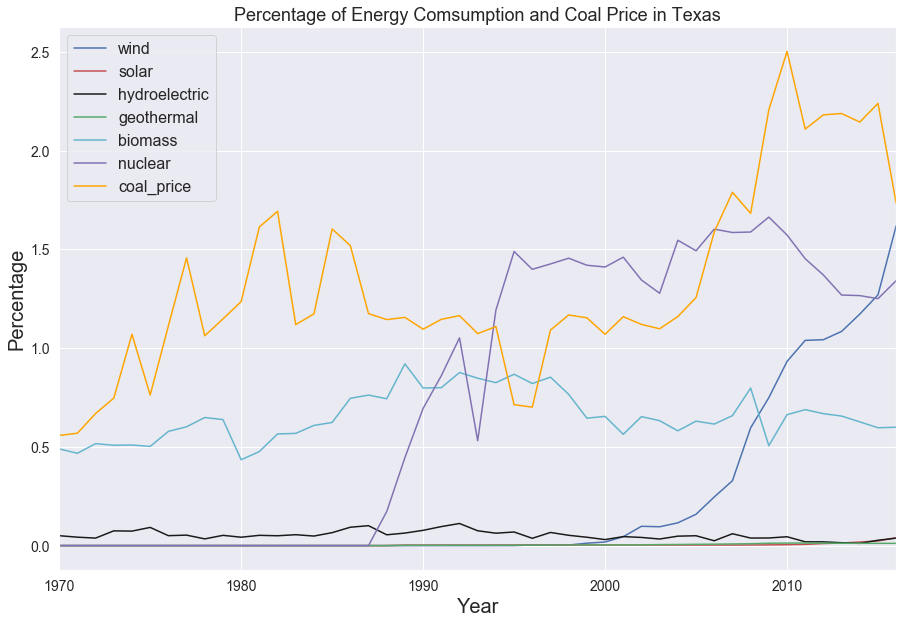

In [294]:
offset_1 = 10
sns.set_style('darkgrid')
plt.figure(figsize=(15,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.plot(year[offset_1:],wind[offset_1:]*100,label="wind")
plt.plot(year[offset_1:],solar[offset_1:]*100,'r',label="solar")
plt.plot(year[offset_1:],hydro[offset_1:]*100,'k',label="hydroelectric")
plt.plot(year[offset_1:],geo[offset_1:]*100,'g',label="geothermal")
plt.plot(year[offset_1:],biomass[offset_1:]*100,'c',label="biomass")
plt.plot(year[offset_1:],nuclear[offset_1:]*100,'m',label="nuclear")
# plt.plot(year,coal*100,'orange',label="coal")
plt.plot(year[offset_1:],coal_price[offset_1-10:],'orange',label="coal_price")


plt.legend(fontsize=16)
plt.ylabel("Percentage",fontsize=20)
plt.xlabel('Year',fontsize=20)
plt.title('Percentage of Energy Comsumption and Coal Price in Texas',fontsize=18)
plt.xlim(1970, 2016)
plt.show()

In [295]:
offset_1 = 20
columns = ['year','coal_price','solar','wind','geo','hydro','biomass','nuclear','coal']
df = pd.DataFrame(columns=columns)
df['year'] = year[offset_1:]
df['coal_price'] = coal_price[offset_1-10:]
df['solar'] = solar[offset_1:]*100
df['wind'] = wind[offset_1:]*100
df['geo'] = geo[offset_1:]*100
df['hydro'] = hydro[offset_1:]*100
df['biomass'] = biomass[offset_1:]*100
df['nuclear'] = nuclear[offset_1:]*100
df['coal'] = coal[offset_1:]*100

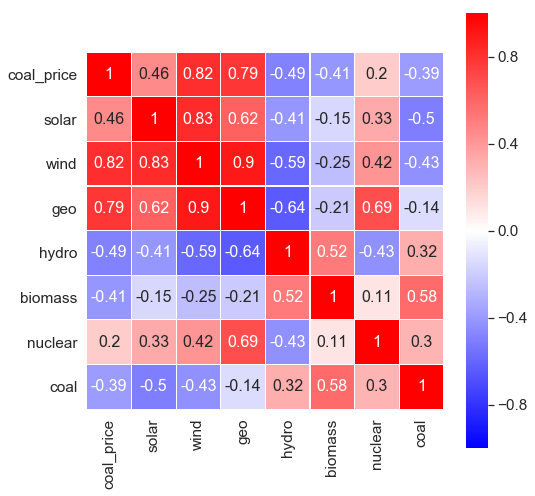

In [296]:
sns.set(font_scale=1.4)
corr = df.drop('year', axis=1).corr() # Exclude the response variable
plt.figure(figsize=(8, 8))
sns.heatmap(corr, 
            cmap='bwr', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 16}, square=True);

In [297]:
lm1 = smf.ols(formula='coal_price ~ wind + solar + nuclear + hydro + geo + biomass + nuclear + coal', data=df).fit()

# print the coefficients
lm1.params
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             coal_price   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     33.99
Date:                Sat, 23 Feb 2019   Prob (F-statistic):           2.58e-12
Time:                        14:44:20   Log-Likelihood:                 17.601
No. Observations:                  37   AIC:                            -19.20
Df Residuals:                      29   BIC:                            -6.314
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.8303      0.338      5.415      0.000       1.139       2.522
wind           0.8218      0.629      1.307      0.201      -0.464       2.108
solar        -32.1826     13.945     -2.308      0.028     -60.703      -3.662
nuclear       -0.2165      0.156     -1.387      0.176      -0.536       0.103
hydro          3.5980      1.874      1.920      0.065      -0.235       7.431
geo           64.9638     58.310      1.114      0.274     -54.293     184.221
biomass       -0.5958      0.411     -1.448      0.158      -1.437       0.246
coal          -0.0361      0.051     -0.705      0.487      -0.141       0.069
==============================================================================
Omnibus:                        2.864   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.239   Jarque-Bera (JB):                1.427
Skew:                           0.042   Prob(JB):                        0.490
Kurtosis:                       2.042   Cond. No.                     2.07e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.07e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [298]:
def pretty_print_linear(coefs, names = None, sort = False):
    if names == None:
        names = ["X%s" % x for x in range(len(coefs))]
    lst = zip(coefs, names)
    if sort:
        lst = sorted(lst,  key = lambda x:-np.abs(x[0]))
    return " + ".join("%s * %s" % (round(coef, 3), name)
                                   for coef, name in lst)


In [299]:
from sklearn.linear_model import Lasso
lm2 = LinearRegression()
X = df[['solar','wind','nuclear', 'hydro','geo', 'biomass','nuclear']]
y = df['coal_price']
names = ['solar','wind','nuclear', 'hydro','geo', 'biomass','nuclear']
lasso = Lasso(alpha=.01)
lasso.fit(X, y)
  
print(pretty_print_linear(lasso.coef_, names, sort = True))


0.798 * wind + -0.075 * nuclear + -0.022 * biomass + -0.001 * nuclear + -0.0 * solar + -0.0 * hydro + 0.0 * geo


In [301]:
def lassoRegressionPermutationTest(X, y, observed_r2, perm_num = 5000):
# Run PLS with suggested number of components
    n_samples = y.shape[0]
    lasso = Lasso(alpha=.01)
    null_r2_score = []
    null_loadings = []
    for k in range(perm_num):
        lasso.fit(X, y[np.random.permutation(n_samples)])
        y_pred = lasso.predict(X)
#         score_null = r2_score(y, y_pred)
        score_null = np.corrcoef(y, np.squeeze(y_pred))[0][1]*np.corrcoef(y, np.squeeze(y_pred))[0][1]
        null_r2_score.append(score_null)
    print(sum(null_r2_score >= observed_r2))
    p_val = float((sum(null_r2_score >= observed_r2)+1))/perm_num
    
    print(p_val)
    return p_val, null_r2_score

In [302]:
observed_r2 = np.corrcoef(lasso.predict(X), y)[0][1]*np.corrcoef(lasso.predict(X), y)[0][1]

In [303]:
p_val, null_r2_score = lassoRegressionPermutationTest(X, y, observed_r2)

106
0.0214


In [304]:
print(observed_r2)

0.687558087051517


/anaconda/envs/deeplearning/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in arcsin
  """Entry point for launching an IPython kernel.


[Text(0,0.5,'coal price (dollars per million btu)'),
 Text(0.5,0,'percentage of wind consumption'),
 Text(0.5,1,'Texas')]

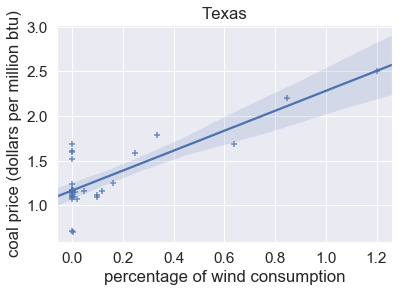

In [309]:
ax = sns.regplot(x=np.arcsin(df['wind']), y=df['coal_price'], marker="+")
ax.set(xlabel='percentage of wind consumption', ylabel='coal price (dollars per million btu)', title='Texas')